In [20]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

In [21]:
import sys
import os

sys.path.append(os.getcwd() + "/..")
#sys.path.append("..")

In [22]:
from dataset_prep_utils_semisup import dirty_semi_supervised_image

In [23]:
#import dataset_prep.dataset_prep_utils_semisup
#import dataset_prep

## Loading data

In [24]:
ls  ../../../data/FreyFaces

frey_rawface.mat  testing_runs/


In [25]:
data_filename = "../../../data/FreyFaces/frey_rawface.mat"

In [26]:
28*20

560

In [27]:
# reshape data
img_x, img_y = 28, 20 # image size
data_arr = loadmat(data_filename, squeeze_me=True, struct_as_record=False)
data_arr = data_arr["ff"].T.reshape((-1, img_x, img_y)) # numpy array


In [28]:
type(data_arr)

numpy.ndarray

In [29]:
data_arr.max()

238

In [30]:
data_arr.min()

8

In [31]:
data_arr.shape

(1965, 28, 20)

In [32]:
# needs to standardize scale to 0-1 ? or keep using 0-256?

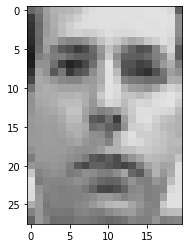

In [33]:
plt.imshow(data_arr[15], cmap="gray", vmin=0, vmax=256)

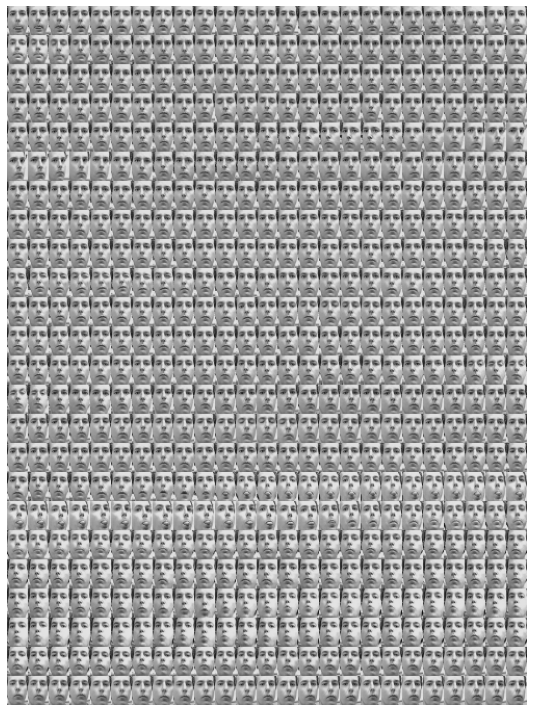

In [34]:
def show_examples(data, n=None, n_cols=20, thumbnail_cb=None, is_gray=False, scale_gray=(0,256)):
    if n is None:
        n = len(data)    
    n_rows = int(np.ceil(n / float(n_cols)))
    figure = np.zeros((img_x * n_rows, img_y * n_cols))
    for k, x in enumerate(data[:n]):
        r = k // n_cols
        c = k % n_cols
        figure[r * img_x: (r + 1) * img_x,
               c * img_y: (c + 1) * img_y] = x
        if thumbnail_cb is not None:
            thumbnail_cb(locals())
        
    plt.figure(figsize=(12, 10))
    if is_gray:
        plt.imshow(figure, cmap="gray", vmin=scale_gray[0], vmax=scale_gray[1])
    else:
        plt.imshow(figure)
    plt.axis("off")
    plt.tight_layout()
    

show_examples(data_arr, n=600, n_cols=25, is_gray=True)


## Testing Noising

In [35]:
## Previous stuff:



# save_folder = "../../data/SimpleShapesWithStrips/"

# run_stats = {
#     "name": "bogus_run",
#     "train_size": 0.8,
#     "valid_size": 0.1,
#     "test_size": 0.1,
#     "trusted_set": {
#         "use_labels": "joint_classes",  # "joint_classes"; no_labels; joint_classes; dirty_classes_only
#         "min_coverage": True,  # True
#         "mc_mode": "fixed_number",  # "stratisfied_v2", fixed ?
#         "samples_fixed": 10,
#         "frac_trusted": 0.30,  # ignored if samples fixed.
#         "y_class_on": True,
#         "y_noise_lists_on": True,
#     },
#     "synth_data": {
#         "type": "ShapesWithStrips",
#         "defs": {
#             "n_samples": 1000,
#             "corrupt_prob": 0.15,  # 0.10, 0.40
#             "random_state": None,  # seed number
#             "combs_on": False,  # False
#         },
#         "noise_list_trusted": "regular",  # "regular" # type of labelling for trusted set, dataset dependent
#     },
# }

# dirty_semi_supervised_synthethic(run_stats, save_folder)


In [36]:
# dirty_semi_supervised_image(
#     array_data, run_stats, path_to_folder, image_dim_in=[28, 28], y_class_in=None
# ):

In [37]:
bogus_folder = "./" # save_folder
image_size_ff = [28, 20]

run_noise_option = "salt_n_pepper" # salt_n_pepper ; simple_systematic

if run_noise_option == "simple_systematic":
    
    run_stats = {
        "name": "bogus_run",
        "train_size": 0.8,
        "valid_size": 0.1,
        "test_size": 0.1,
        "trusted_set": {
            "use_labels": "joint_classes",  # "joint_classes"; no_labels; joint_classes; dirty_classes_only
            "min_coverage": True,  # True
            "mc_mode": "stratisfied_v2",  # "fixed_number" "stratisfied_v2", fixed ?
            "samples_fixed": 10,
            "frac_trusted": 0.05,  # ignored if samples fixed.
            "y_class_on": True,
            "y_noise_lists_on": True,
        },
        "type_noise": "SystematicSimpleShapes",
        "defs": {
            "p_img": 0.40, # corruption probability
            "min_val": 0,
            "max_val": 256, # check this, and if freyfaces needs standardizing beforehand.
            "p_min": 0.5,
            "pixel_val_fixed": None, # otherwise fix a value value; None or value (e.g. 150)
            "number_blocks": 4, # 1 ; 2; 4
            "rand_blocks": False,
            "side_len": 4, # 4 ; 11
            "std_shift": (10,10), # (10,10) ; (5, 6)
            "use_other_patterns": False,
            "random_state": None,  # seed number
            "combs_on": False,  # True / False
        },
        "noise_list_trusted": "regular",  # "regular" # type of labelling for trusted set, dataset dependent
    }


    # NOTE:

    # img_prob_noise=run_stats["defs"]["p_img"],
    # min_val=run_stats["defs"]["min_val"],
    # max_val=run_stats["defs"]["max_val"],
    # prob_min=run_stats["defs"]["p_min"],
    # pixel_val_fixed=run_stats["defs"]["pixel_val_fixed"],
    # number_blocks=run_stats["defs"]["number_blocks"],
    # rand_blocks=run_stats["defs"]["rand_blocks"],
    # side_len=run_stats["defs"]["side_len"],
    # std_shift=run_stats["defs"]["std_shift"],
    # use_other_patterns=run_stats["defs"]["use_other_patterns"],
    # random_state=run_stats["defs"]["random_state"],
    # combs_on=run_stats["defs"]["combs_on"],

    # ["noise_list_trusted"] ; 

    # ["trusted_set"]["y_class_on"] ; ["trusted_set"]["y_noise_lists_on"] ; ["trusted_set"]["use_labels"] ;

    # ["trusted_set"]["use_labels"] := "clean_class_only" / "dirty_classes_only" / "joint_classes"

elif run_noise_option == "salt_n_pepper":
    
    run_stats = {
        "name": "bogus_run",
        "train_size": 0.8,
        "valid_size": 0.1,
        "test_size": 0.1,
        "trusted_set": {
            "use_labels": "joint_classes",  # "joint_classes"; no_labels; joint_classes; dirty_classes_only
            "min_coverage": True,  # True
            "mc_mode": "stratisfied_v2",  # "fixed_number" "stratisfied_v2", fixed ?
            "samples_fixed": 10,
            "frac_trusted": 0.05,  # ignored if samples fixed.
            "y_class_on": True,
            "y_noise_lists_on": True,
        },
        "type_noise": "SaltnPepper",
        "defs": {
            "p_img": 0.40, # image corruption probability
            "min_val": 0,
            "max_val": 256, # check this, and if freyfaces needs standardizing beforehand.
            "p_min": 0.5,
            "p_pixel": 0.2, # pixel corruption probability
            "conv_to_int": False,
        },
    }
    
    # NOTE:
    
    # probability=run_stats["defs"]["p_img"],
    # one_cell_flag=False,
    # min_val=run_stats["defs"]["min_val"],
    # max_val=run_stats["defs"]["max_val"],
    # p_min=run_stats["defs"]["p_min"],
    # p_pixel=run_stats["defs"]["p_pixel"],
    # conv_to_int=run_stats["defs"]["conv_to_int"],


In [38]:
dirty_semi_supervised_image(data_arr, run_stats, bogus_folder, 
                            image_size_ff, y_class_in=None)



## Loading Noised Data

In [39]:
ls

bogus_run/  test_freyfaces_simple.py
__init_.py  Testing_Frey_Faces_Noising.ipynb


In [40]:
ls bogus_run/train/

cells_changed_mtx.csv  data_noised.csv    tuples_changed_mtx.csv
changes_summary.csv    original_idxs.csv  y_noise_dict.json
data_clean.csv         trusted_idxs.csv


In [41]:
noised_data_train_df = pd.read_csv("./bogus_run/train/data_noised.csv")
clean_data_train_df =  pd.read_csv("./bogus_run/train/data_clean.csv")

trusted_idxs = pd.read_csv("./bogus_run/train/trusted_idxs.csv").values.flatten()

tuples_train_changed = pd.read_csv("./bogus_run/train/tuples_changed_mtx.csv").values.flatten()
tuples_train_changed =  tuples_train_changed.astype(bool)
cells_train_changed = pd.read_csv("./bogus_run/train/cells_changed_mtx.csv").values.reshape(-1,28,20)
cells_train_changed = cells_train_changed.astype(bool)

with open("./bogus_run/train/y_noise_dict.json", "r") as read_file:
    y_noise_dict = json.load(read_file)

In [42]:
y_noise_dict.keys()

dict_keys(['0', '1', '2', '3'])

In [43]:
trusted_idxs

array([1330,  171,  525,  886,  203,  979, 1261,   55,   63,  799, 1099,
        434, 1447,   26,  617,  540,  382,  538,  807, 1284, 1144,  922,
        293, 1559, 1475,  253, 1322,  367, 1058, 1187,  589,  596, 1260,
         83,  311,  463,  743,  638,  905,  478,  346, 1235,  795,  634,
        149, 1256, 1503, 1238,  454, 1501,  305,  965, 1553, 1051, 1210,
        837,  918,  363,  468,  773, 1505,  926,  530,  958,  479, 1544,
       1196,  941, 1483,  431, 1366, 1019, 1118, 1541,  448, 1267, 1448,
        264, 1072])

In [44]:
cells_train_changed

array([[[False, False, False, ..., False, False, False],
        [False, False,  True, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False,  True],
        [ True,  True, False, ..., False, False, False]],

       [[False, False,  True, ...,  True, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ...,  True, False,  True],
        ...,
        [False,  True, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False,  True, ..., False, False, False]],

       [[ True, False, False, ..., False, False, False],
        [ True, False,  True, ..., False, False,  True],
        [False, False,  True, ..., False, False, False],
        ...,
        [ True, False,  True, ..., False, False, False],
        [False, False,  True, ..., False, Fal

In [45]:
tuples_train_changed

array([ True,  True,  True, ...,  True,  True,  True])

In [46]:
noised_data_train_df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_550,pixel_551,pixel_552,pixel_553,pixel_554,pixel_555,pixel_556,pixel_557,pixel_558,pixel_559
0,151.0,179.0,191.0,0.0,205.0,256.0,218.0,222.0,225.0,226.0,...,256.0,109.0,256.0,256.0,0.0,0.0,157.0,184.0,203.0,201.0
1,60.0,77.0,0.0,161.0,172.0,175.0,180.0,201.0,218.0,222.0,...,107.0,110.0,109.0,114.0,120.0,125.0,164.0,134.0,173.0,182.0
2,0.0,181.0,181.0,201.0,208.0,0.0,222.0,224.0,225.0,226.0,...,118.0,97.0,98.0,117.0,256.0,159.0,194.0,201.0,256.0,256.0
3,128.0,157.0,168.0,181.0,186.0,191.0,200.0,218.0,223.0,225.0,...,146.0,149.0,155.0,158.0,141.0,139.0,162.0,161.0,163.0,171.0
4,52.0,72.0,102.0,159.0,166.0,170.0,173.0,198.0,213.0,220.0,...,111.0,114.0,111.0,114.0,121.0,125.0,150.0,175.0,173.0,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,100.0,147.0,168.0,182.0,188.0,194.0,200.0,221.0,224.0,225.0,...,112.0,110.0,109.0,110.0,119.0,140.0,152.0,171.0,184.0,189.0
1568,0.0,76.0,0.0,176.0,183.0,0.0,256.0,221.0,256.0,224.0,...,104.0,100.0,104.0,113.0,121.0,256.0,148.0,167.0,162.0,165.0
1569,85.0,145.0,172.0,177.0,174.0,175.0,256.0,208.0,210.0,0.0,...,113.0,110.0,109.0,110.0,116.0,110.0,132.0,256.0,153.0,127.0
1570,109.0,143.0,162.0,174.0,181.0,190.0,198.0,0.0,216.0,220.0,...,105.0,105.0,106.0,122.0,153.0,173.0,0.0,192.0,195.0,196.0


In [47]:
noised_train_data = noised_data_train_df.values.reshape(-1, 28,20)
clean_train_data = clean_data_train_df.values.reshape(-1, 28,20)

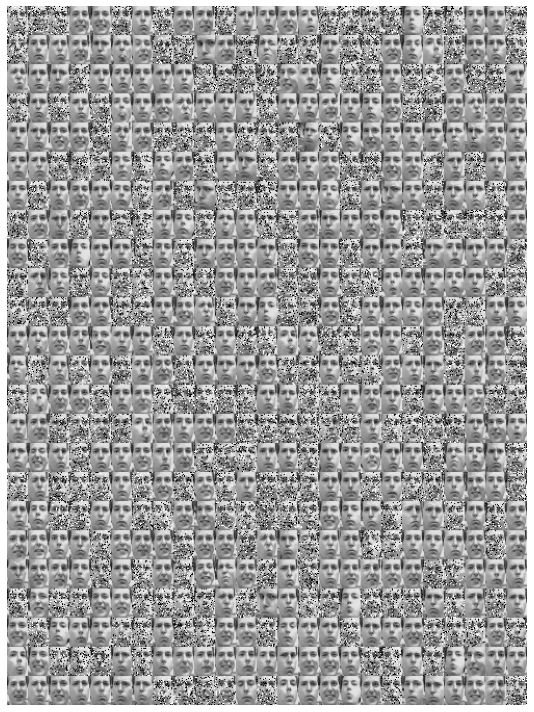

In [48]:
show_examples(noised_train_data, n=600, n_cols=25, is_gray=True) 

y_noise: 0


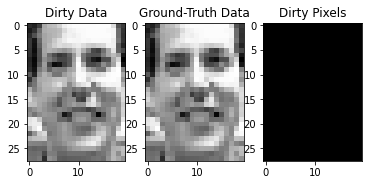

y_noise: 0


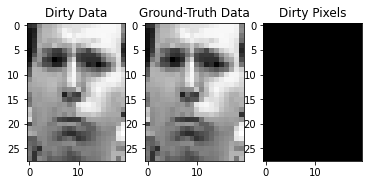

y_noise: 0


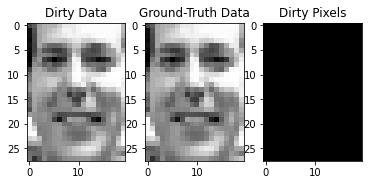

y_noise: 0


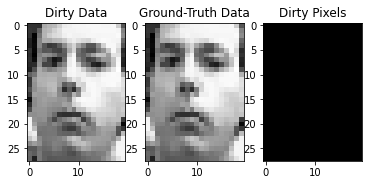

y_noise: 0


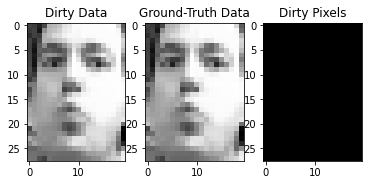

y_noise: 0


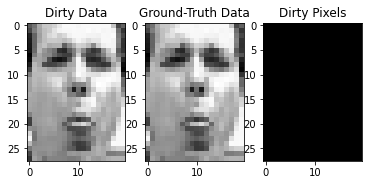

y_noise: 0


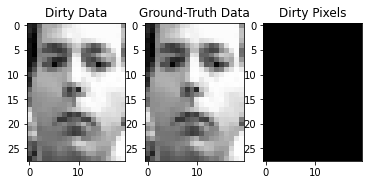

y_noise: 0


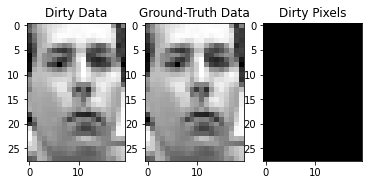

y_noise: 0


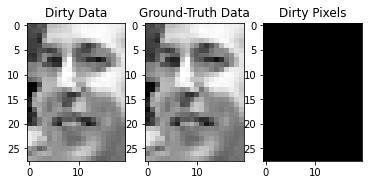

y_noise: 0


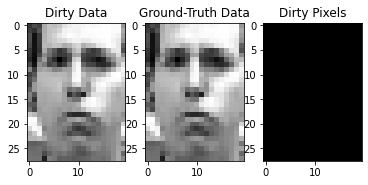

y_noise: 0


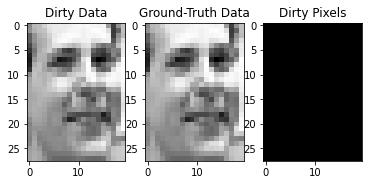

y_noise: 0


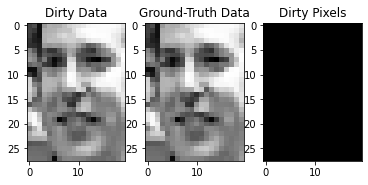

y_noise: 0


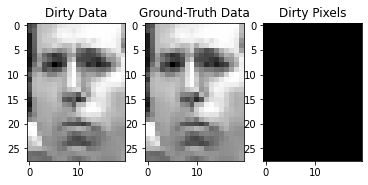

y_noise: 0


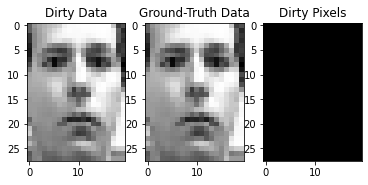

y_noise: 0


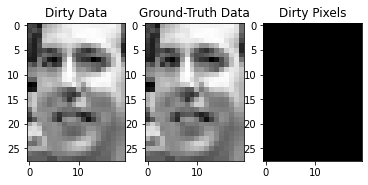

y_noise: 0


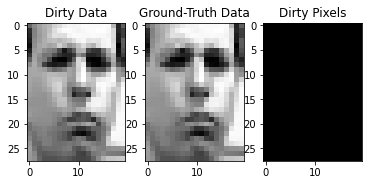

y_noise: 0


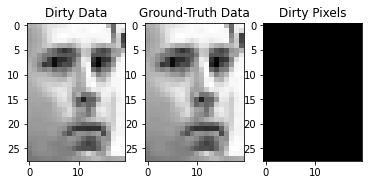

y_noise: 0


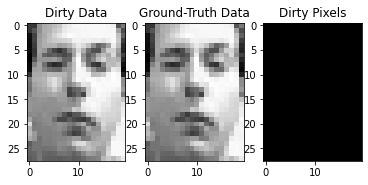

y_noise: 0


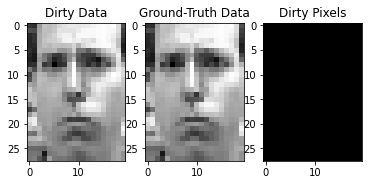

y_noise: 0


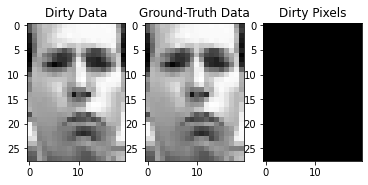

y_noise: 0


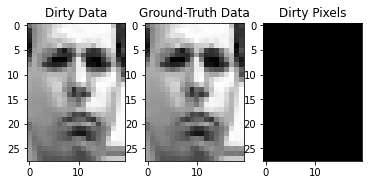

y_noise: 0


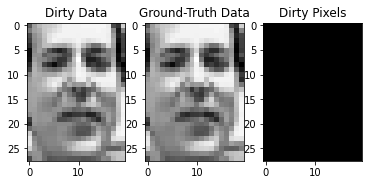

y_noise: 0


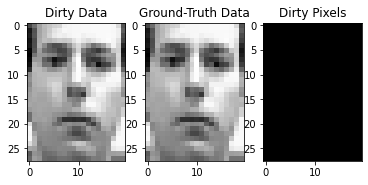

y_noise: 0


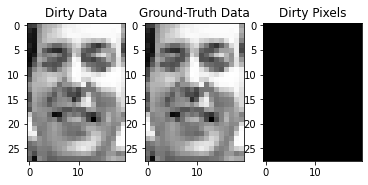

y_noise: 0


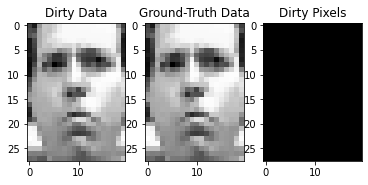

y_noise: 0


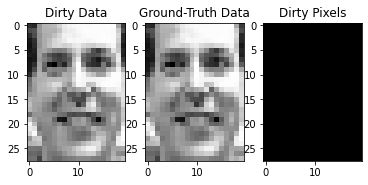

y_noise: 0


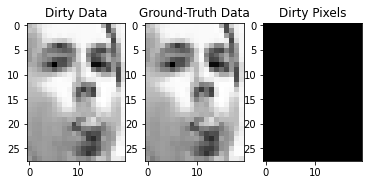

y_noise: 0


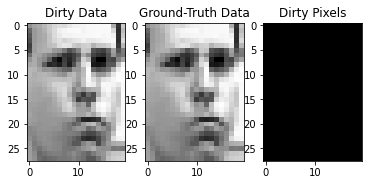

y_noise: 0


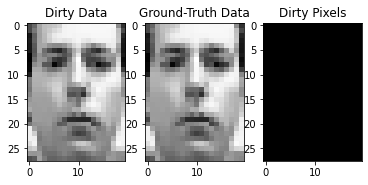

y_noise: 0


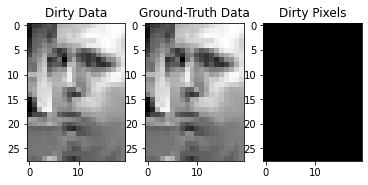

y_noise: 0


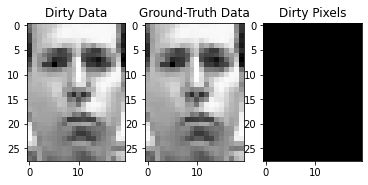

y_noise: 0


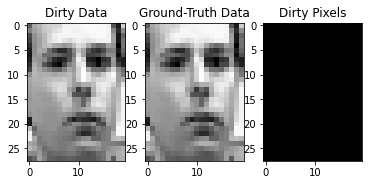

y_noise: 0


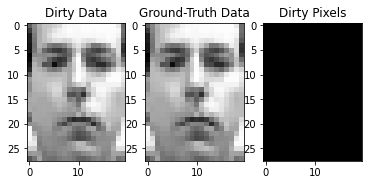

y_noise: 0


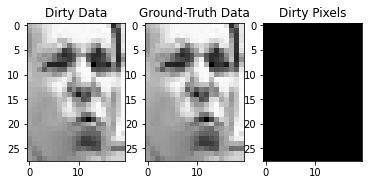

y_noise: 0


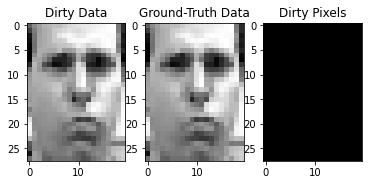

y_noise: 0


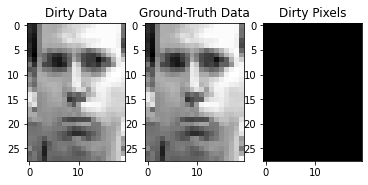

y_noise: 0


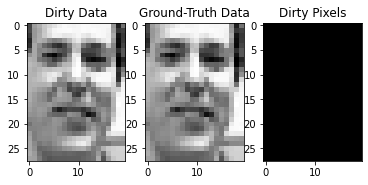

y_noise: 0


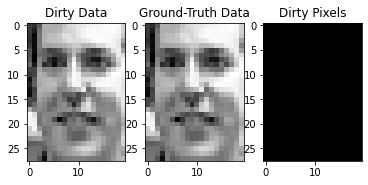

y_noise: 0


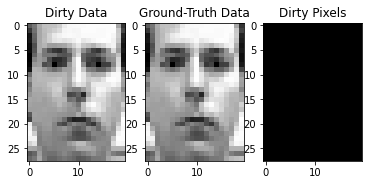

y_noise: 0


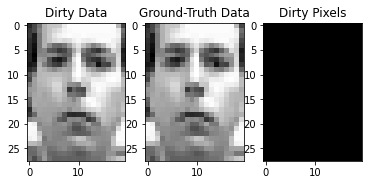

y_noise: 0


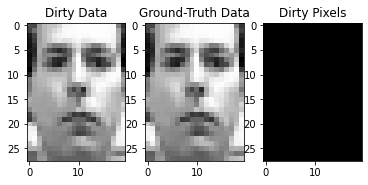

y_noise: 0


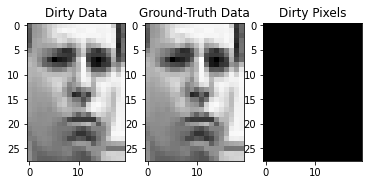

y_noise: 0


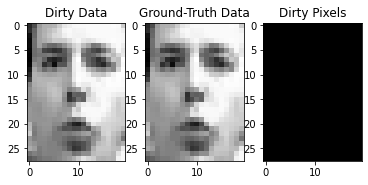

y_noise: 0


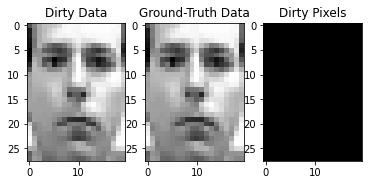

y_noise: 0


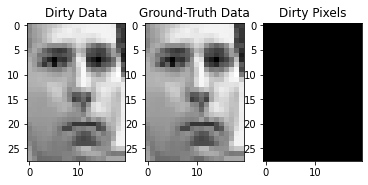

y_noise: 0


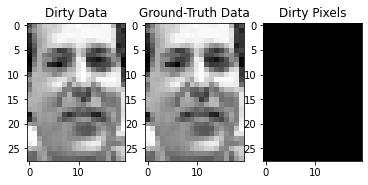

y_noise: 0


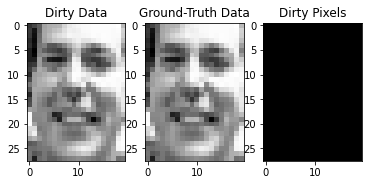

y_noise: 1


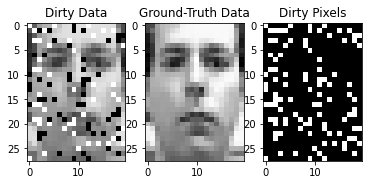

y_noise: 1


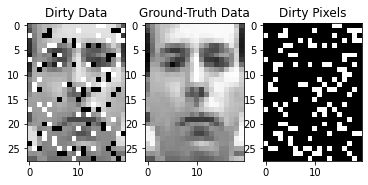

y_noise: 1


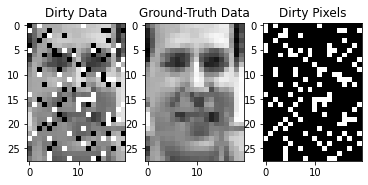

y_noise: 1


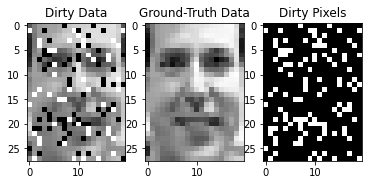

y_noise: 1


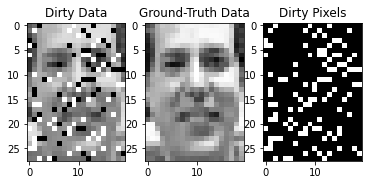

y_noise: 1


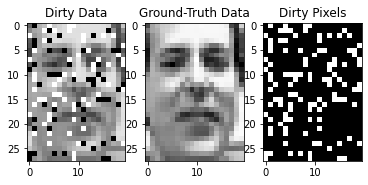

y_noise: 1


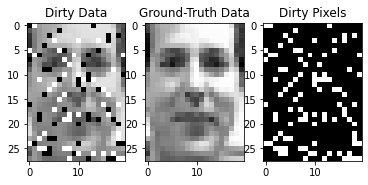

y_noise: 1


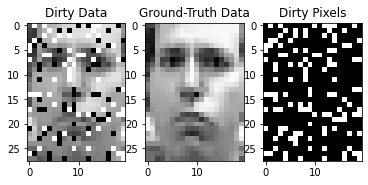

y_noise: 1


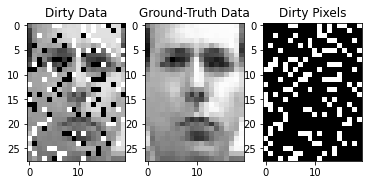

y_noise: 1


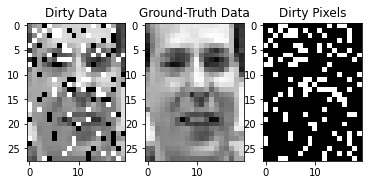

y_noise: 1


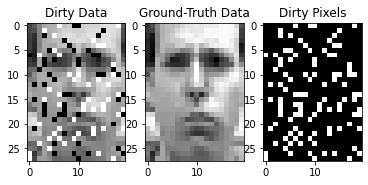

y_noise: 1


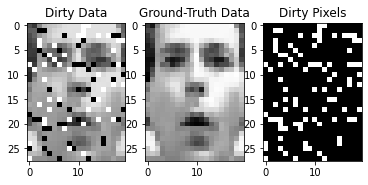

y_noise: 1


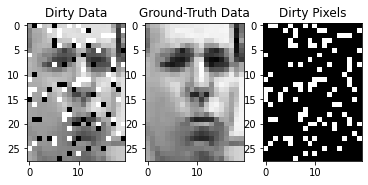

y_noise: 1


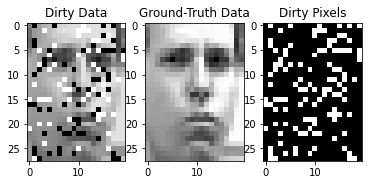

y_noise: 1


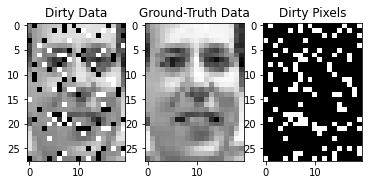

y_noise: 1


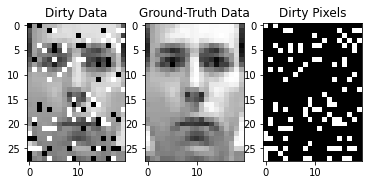

y_noise: 1


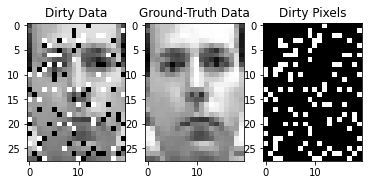

y_noise: 1


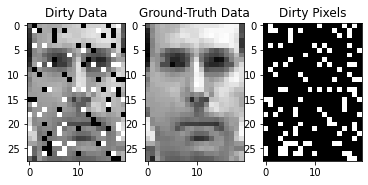

y_noise: 1


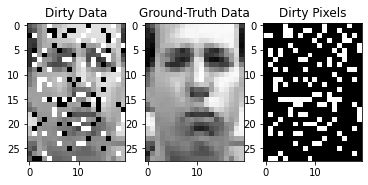

y_noise: 1


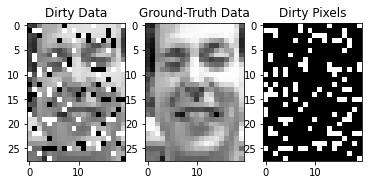

y_noise: 1


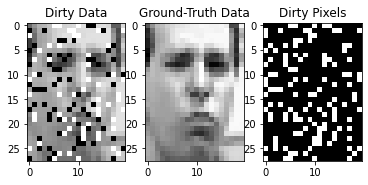

y_noise: 1


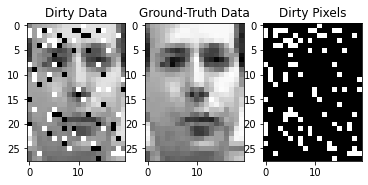

y_noise: 1


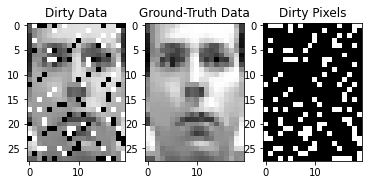

y_noise: 1


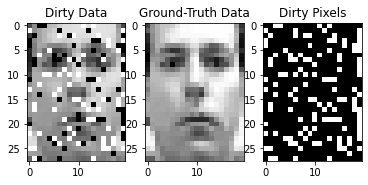

y_noise: 1


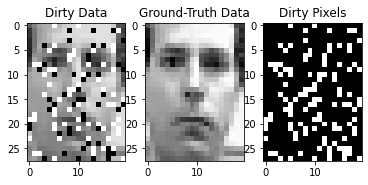

y_noise: 1


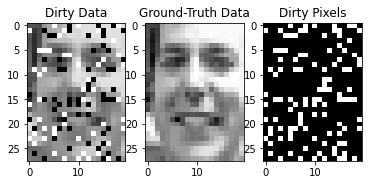

y_noise: 1


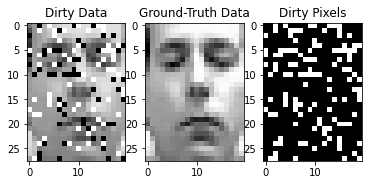

y_noise: 1


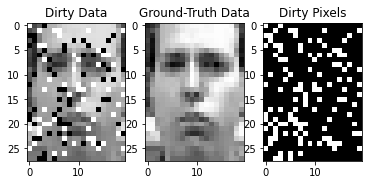

y_noise: 1


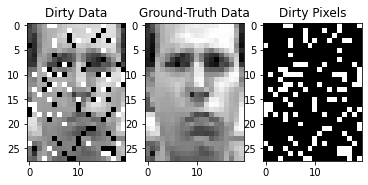

y_noise: 1


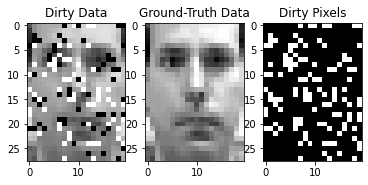

y_noise: 1


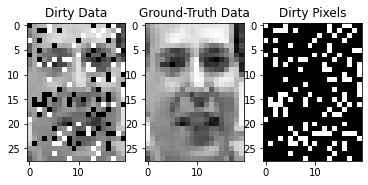

y_noise: 1


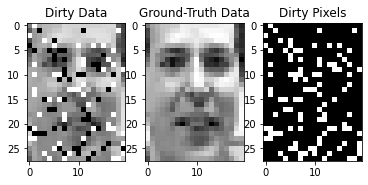

In [49]:
# Show Trusted Set

for idx in trusted_idxs:
    print("y_noise: {}".format(int(tuples_train_changed[idx])))
    fig, ax = plt.subplots(1,3)
    ax[0].imshow(noised_train_data[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(clean_train_data[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(cells_train_changed[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    plt.show()


y_noise: 1


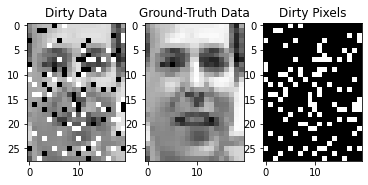

y_noise: 1


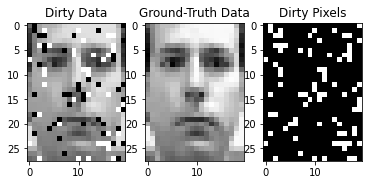

y_noise: 1


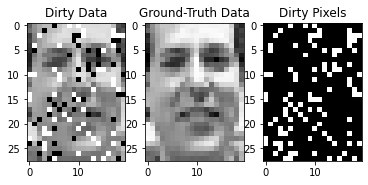

y_noise: 1


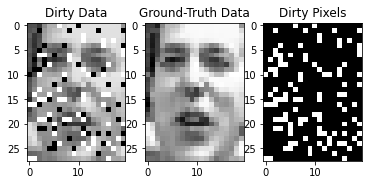

y_noise: 1


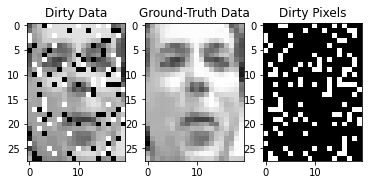

y_noise: 1


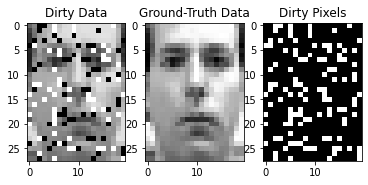

y_noise: 1


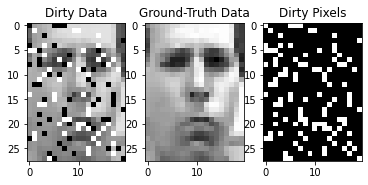

y_noise: 1


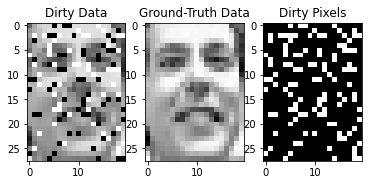

y_noise: 1


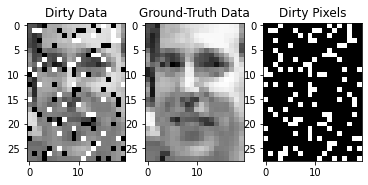

y_noise: 1


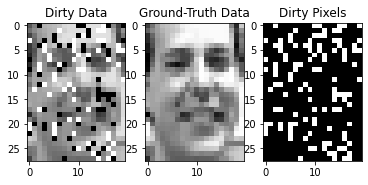

y_noise: 1


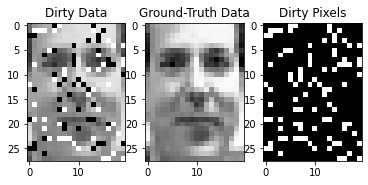

y_noise: 1


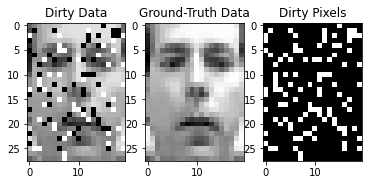

y_noise: 1


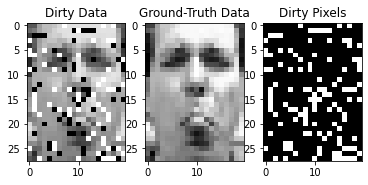

y_noise: 1


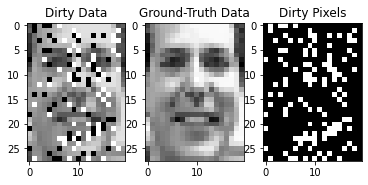

y_noise: 1


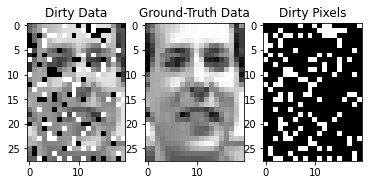

y_noise: 1


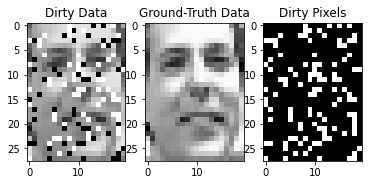

y_noise: 1


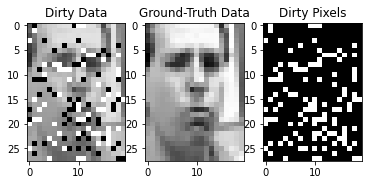

y_noise: 1


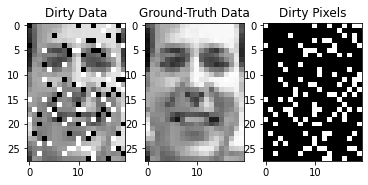

y_noise: 1


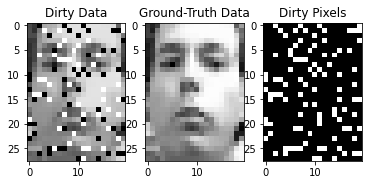

y_noise: 1


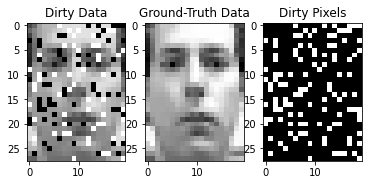

y_noise: 1


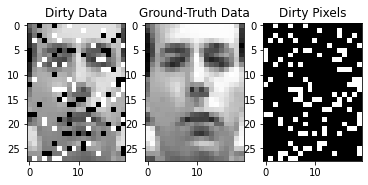

y_noise: 1


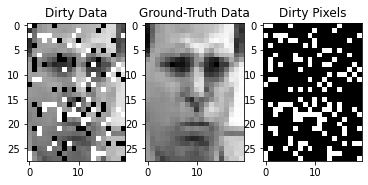

y_noise: 1


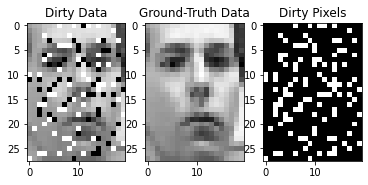

y_noise: 1


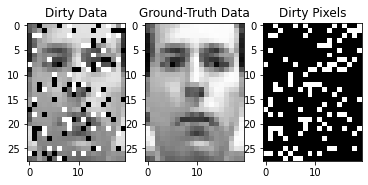

y_noise: 1


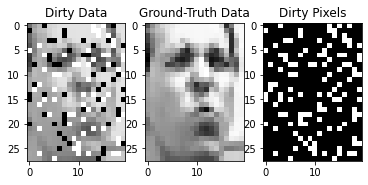

In [50]:
# Show Random Dirty Images

max_imgs_show = 25
y_noise_idxs_train = np.where(tuples_train_changed)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(tuples_train_changed[idx])))
    fig, ax = plt.subplots(1,3)
    ax[0].imshow(noised_train_data[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(clean_train_data[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(cells_train_changed[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    plt.show()


y_noise: 0


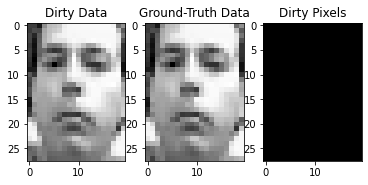

y_noise: 0


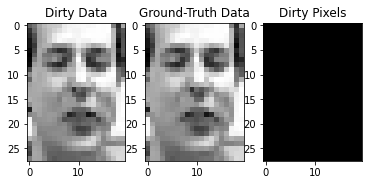

y_noise: 0


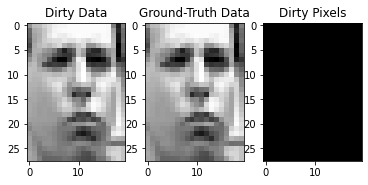

y_noise: 0


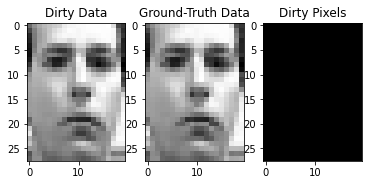

y_noise: 0


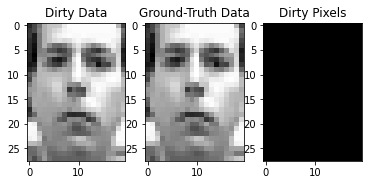

y_noise: 0


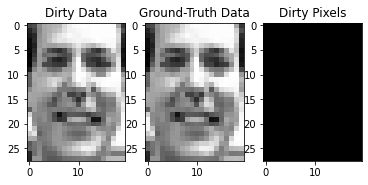

y_noise: 0


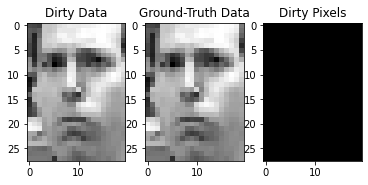

y_noise: 0


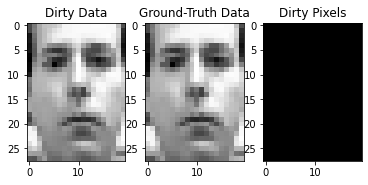

y_noise: 0


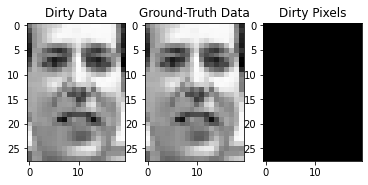

y_noise: 0


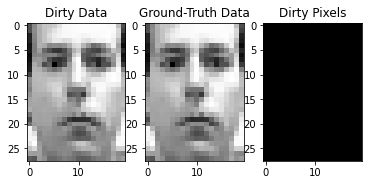

y_noise: 0


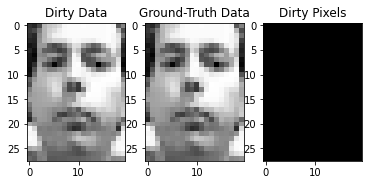

y_noise: 0


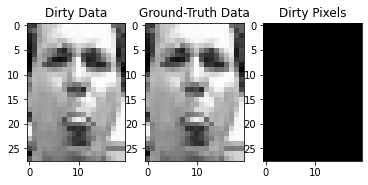

y_noise: 0


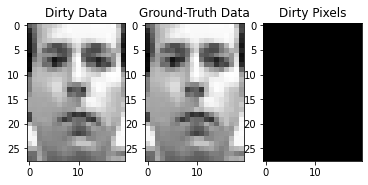

y_noise: 0


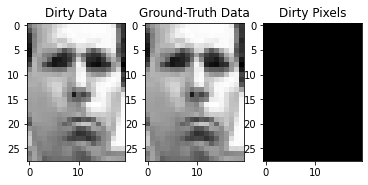

y_noise: 0


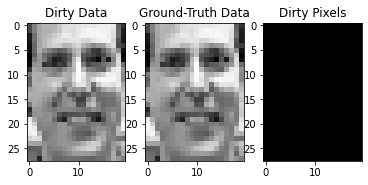

y_noise: 0


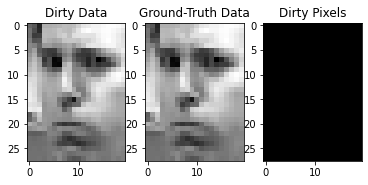

y_noise: 0


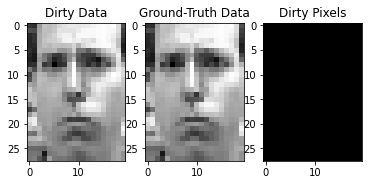

y_noise: 0


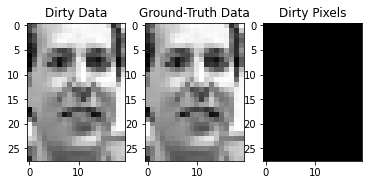

y_noise: 0


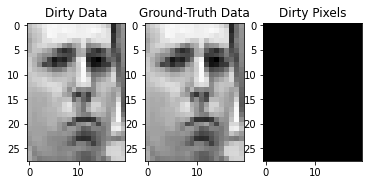

y_noise: 0


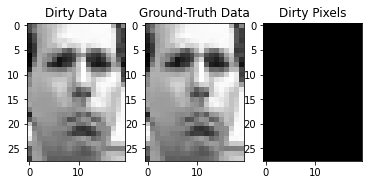

y_noise: 0


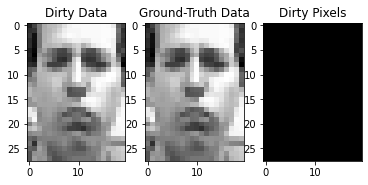

y_noise: 0


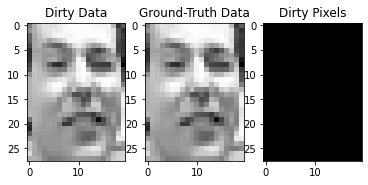

y_noise: 0


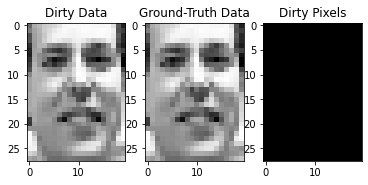

y_noise: 0


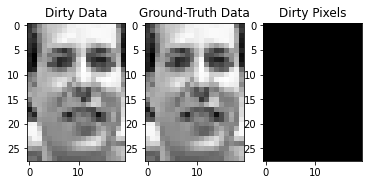

y_noise: 0


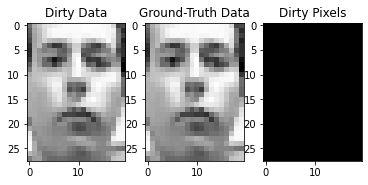

In [51]:
# Show Random Clean Images

max_imgs_show = 25
y_noise_idxs_train = np.where(~tuples_train_changed)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(tuples_train_changed[idx])))
    fig, ax = plt.subplots(1,3)
    ax[0].imshow(noised_train_data[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(clean_train_data[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(cells_train_changed[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    plt.show()
